In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = r'D:\Christ\Sem 5\Predictive Analytics\online+retail\Online Retail.xlsx'
df = pd.read_excel(file_path)

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#### Q1. Data Cleaning and Preparation

In [4]:
# Count of rows with missing CustomerID
missing_customer_id_count = df['CustomerID'].isnull().sum()
print(f"\nTotal Rows with Missing CustomerID: {missing_customer_id_count}")

# Count of duplicate rows
duplicate_rows_count = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_rows_count}")

# Count of rows with negative or zero quantities
negative_or_zero_quantity_count = (df['Quantity'] <= 0).sum()
print(f"Total Rows with Negative or Zero Quantities: {negative_or_zero_quantity_count}")



Total Rows with Missing CustomerID: 135080
Total Duplicate Rows: 5268
Total Rows with Negative or Zero Quantities: 10624


In [5]:
#Q1.1
df.dropna(subset=['CustomerID'], inplace=True)  # Remove rows with missing CustomerID
df.drop_duplicates(inplace=True)  # Remove duplicate rows
df = df[df['Quantity'] > 0]  # Remove rows with negative or zero quantities

In [6]:
# Count of rows with missing CustomerID
missing_customer_id_count = df['CustomerID'].isnull().sum()
print(f"\nTotal Rows with Missing CustomerID: {missing_customer_id_count}")

# Count of duplicate rows
duplicate_rows_count = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_rows_count}")

# Count of rows with negative or zero quantities
negative_or_zero_quantity_count = (df['Quantity'] <= 0).sum()
print(f"Total Rows with Negative or Zero Quantities: {negative_or_zero_quantity_count}")


Total Rows with Missing CustomerID: 0
Total Duplicate Rows: 0
Total Rows with Negative or Zero Quantities: 0


In [7]:
#Q1.2
desc_stats = df[['Quantity', 'UnitPrice']].describe()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert InvoiceDate to datetime
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
             Quantity      UnitPrice
count  392732.000000  392732.000000
mean       13.153718       3.125596
std       181.588420      22.240725
min         1.000000       0.000000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000


C:\Users\ismaeeel\AppData\Local\Temp\ipykernel_15376\2077659366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert InvoiceDate to datetime


In [8]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#### Q2. Sales Analysis

In [17]:
# Q2.1: Top 10 best-selling products by quantity with descriptions
top_10_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

# Get unique product descriptions linked to StockCode
product_descriptions = df[['StockCode', 'Description']].drop_duplicates()

# Merge top 10 products with descriptions
top_10_products_desc = pd.DataFrame(top_10_products).merge(product_descriptions, on='StockCode', how='left')

# Display top 10 best-selling products with descriptions
print("\nTop 10 Best-Selling Products (with Description):\n")
print(top_10_products_desc[['StockCode', 'Description', 'Quantity']])






Top 10 Best-Selling Products (with Description):

   StockCode                         Description  Quantity
0      23843         PAPER CRAFT , LITTLE BIRDIE     80995
1      23166      MEDIUM CERAMIC TOP STORAGE JAR     77916
2      84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
3      22197                SMALL POPCORN HOLDER     49160
4      22197                      POPCORN HOLDER     49160
5     85099B             JUMBO BAG RED RETROSPOT     46078
6     85123A  WHITE HANGING HEART T-LIGHT HOLDER     36763
7     85123A  CREAM HANGING HEART T-LIGHT HOLDER     36763
8      84879       ASSORTED COLOUR BIRD ORNAMENT     35263
9      21212     PACK OF 72 RETROSPOT CAKE CASES     33670
10     23084                  RABBIT NIGHT LIGHT     27153
11     22492             MINI PAINT SET VINTAGE      26076


In [10]:
# Q2.2: Total revenue generated by each product, with description
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Group by StockCode and calculate total revenue for each product
product_revenue = df.groupby('StockCode')['TotalSales'].sum().sort_values(ascending=False)

# Get unique product descriptions linked to StockCode
product_descriptions = df[['StockCode', 'Description']].drop_duplicates()

# Merge revenue with product descriptions
product_revenue_desc = pd.DataFrame(product_revenue).merge(product_descriptions, on='StockCode', how='left')

# Display total revenue by product with descriptions
print("\nTotal Revenue by Product (with Description):\n")
print(product_revenue_desc[['StockCode', 'Description', 'TotalSales']].head(10))



Total Revenue by Product (with Description):

  StockCode                         Description  TotalSales
0     23843         PAPER CRAFT , LITTLE BIRDIE   168469.60
1     22423            REGENCY CAKESTAND 3 TIER   142264.75
2    85123A  WHITE HANGING HEART T-LIGHT HOLDER   100547.45
3    85123A  CREAM HANGING HEART T-LIGHT HOLDER   100547.45
4    85099B             JUMBO BAG RED RETROSPOT    85040.54
5     23166      MEDIUM CERAMIC TOP STORAGE JAR    81416.73
6      POST                             POSTAGE    77803.96
7     47566                       PARTY BUNTING    68785.23
8     84879       ASSORTED COLOUR BIRD ORNAMENT    56413.03
9         M                              Manual    53419.93


C:\Users\ismaeeel\AppData\Local\Temp\ipykernel_15376\924301329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSales'] = df['Quantity'] * df['UnitPrice']


C:\Users\ismaeeel\AppData\Local\Temp\ipykernel_15376\1911340846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')


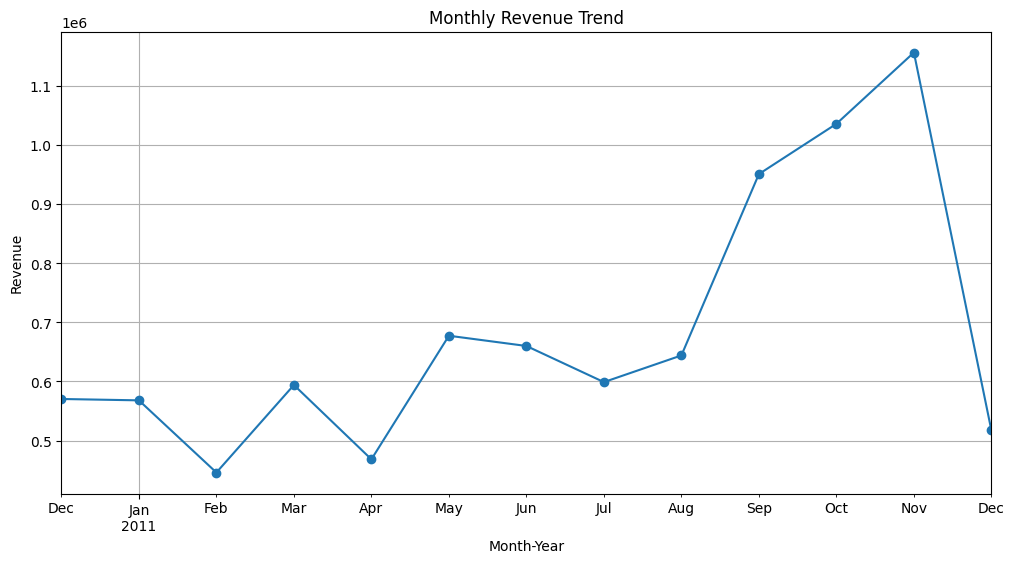

In [11]:
# Q2.3: Monthly revenue trend
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('MonthYear')['TotalSales'].sum()

# Plotting Monthly Revenue Trend
plt.figure(figsize=(12,6))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()



####  Q3. Customer Behaviour

In [12]:
# Q3.1: Number of unique customers and percentage of sales by repeat customers
unique_customers = df['CustomerID'].nunique()
repeat_customers = df[df.duplicated('CustomerID', keep=False)]['CustomerID'].nunique()
repeat_percentage = (repeat_customers / unique_customers) * 100
print(f"\nUnique Customers: {unique_customers}")
print(f"Repeat Customer Percentage: {repeat_percentage:.2f}%")




Unique Customers: 4339
Repeat Customer Percentage: 98.34%



Average Order Value: 479.46
Country-wise Average Order Value:
Country
Netherlands             120.798282
Australia               116.937340
Japan                   116.561900
Singapore                95.852658
Sweden                   85.261844
Denmark                  49.882474
Lithuania                47.458857
Lebanon                  37.641778
EIRE                     36.699289
Brazil                   35.737500
Norway                   33.736418
Czech Republic           33.069600
Finland                  32.913985
Greece                   32.831172
Bahrain                  32.258824
Switzerland              30.642752
Israel                   29.452408
United Arab Emirates     27.974706
Channel Islands          27.363507
Austria                  25.624824
Germany                  25.332713
France                   25.091187
Spain                    24.822000
Malta                    24.335625
Canada                   24.280662
Iceland                  23.681319
Italy              

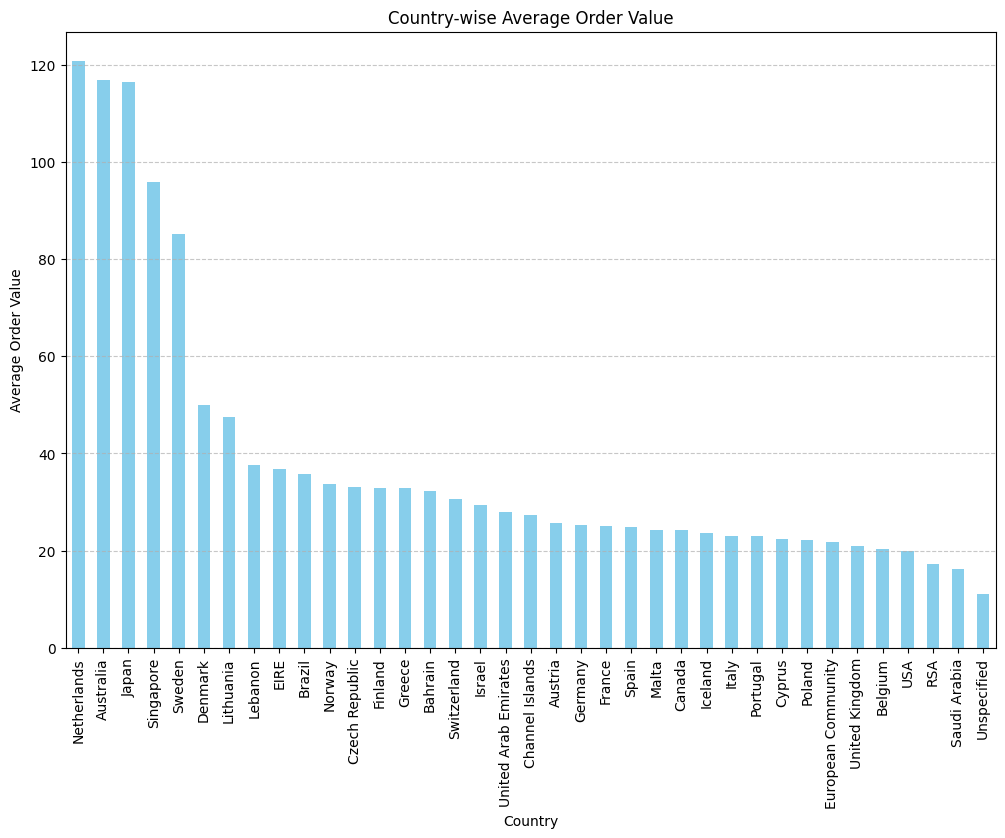

In [23]:
# Q3.2: Average order value per invoice and variation across different customer segments (country-wise)

# Calculate average order value per invoice
avg_order_value = df.groupby('InvoiceNo')['TotalSales'].sum().mean()

# Calculate country-wise average order value
country_avg_order_value = df.groupby('Country')['TotalSales'].mean().sort_values(ascending=False)

# Print the results
print(f"\nAverage Order Value: {avg_order_value:.2f}")
print(f"Country-wise Average Order Value:\n{country_avg_order_value}")

# Plot country-wise average order value
plt.figure(figsize=(12, 8))
country_avg_order_value.plot(kind='bar', color='skyblue')
plt.title('Country-wise Average Order Value')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





Country-wise Total Revenue:
 Country
United Kingdom          7285024.644
Netherlands              285446.340
EIRE                     265262.460
Germany                  228678.400
France                   208934.310
Australia                138453.810
Spain                     61558.560
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33375.840
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13502.850
Austria                   10198.680
Poland                     7334.650
Israel                     7215.840
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                     

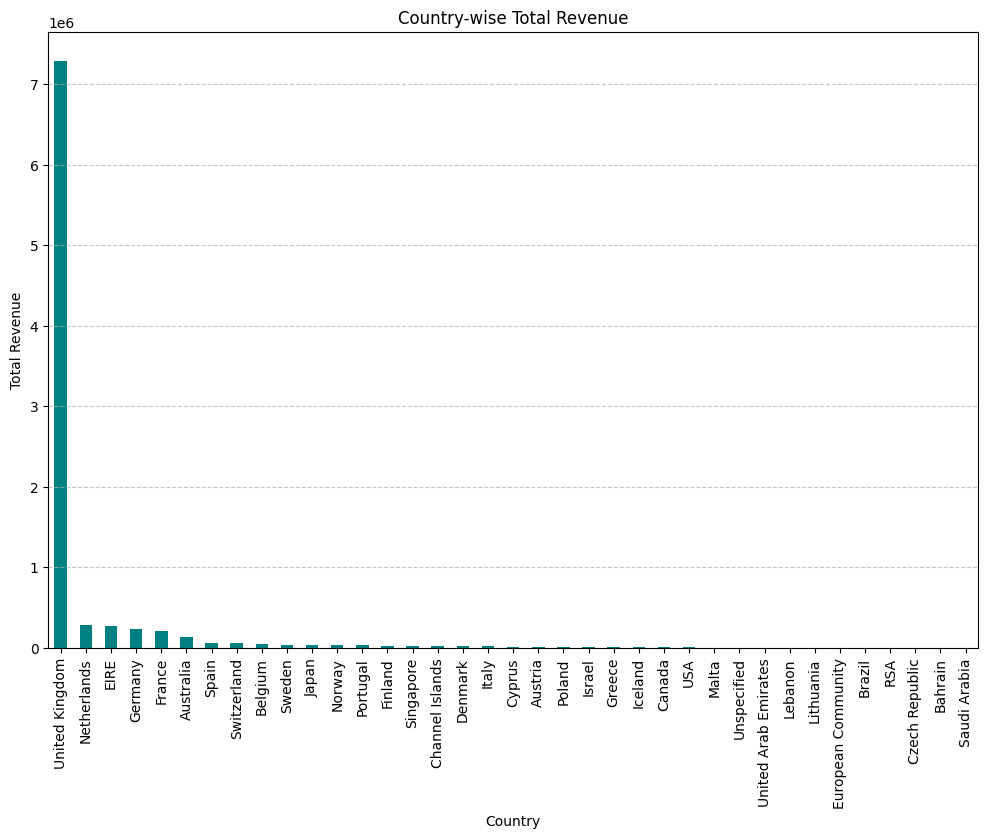

In [24]:
# Q3.3: Countries contributing the most to sales revenue

# Calculate total revenue by country
country_revenue = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
print("\nCountry-wise Total Revenue:\n", country_revenue)

# Plot country-wise total revenue
plt.figure(figsize=(12, 8))
country_revenue.plot(kind='bar', color='teal')
plt.title('Country-wise Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



#### Q4. Product Performance


Top 5 Countries by Average Revenue Per Transaction:
 Country
Netherlands    120.798282
Australia      116.937340
Japan          116.561900
Singapore       95.852658
Sweden          85.261844
Name: TotalSales, dtype: float64


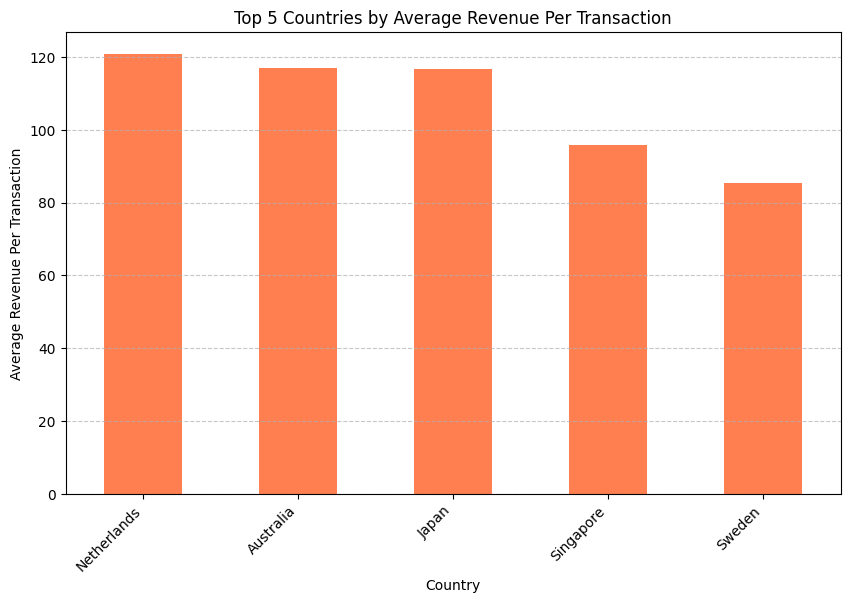

In [20]:

# Q4.1: Top 5 countries with the highest average revenue per transaction

# Get the top 5 countries with the highest average revenue per transaction
top_5_countries = country_avg_order_value.head(5)
print("\nTop 5 Countries by Average Revenue Per Transaction:\n", top_5_countries)

# Plot the top 5 countries
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar', color='coral')
plt.title('Top 5 Countries by Average Revenue Per Transaction')
plt.xlabel('Country')
plt.ylabel('Average Revenue Per Transaction')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



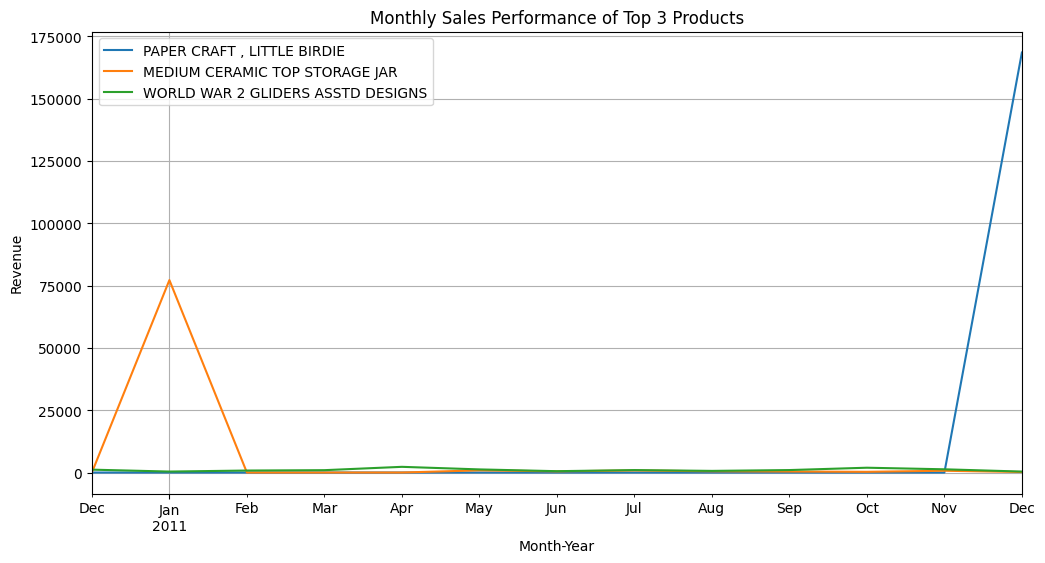

In [16]:
# Q4.2: Investigate seasonal/monthly performance of certain products with descriptions

# Get the unique product descriptions linked to the StockCode
product_descriptions = df[['StockCode', 'Description']].drop_duplicates()

# Group sales data by StockCode and MonthYear, then calculate total sales for each product
product_monthly_sales = df.groupby(['StockCode', 'MonthYear'])['TotalSales'].sum().unstack().fillna(0)

# Get the top 3 best-selling products (already calculated in Q2.1)
top_3_products = top_10_products.index[:3]

# Create a dictionary to map StockCode to Description
product_desc_map = product_descriptions.set_index('StockCode')['Description'].to_dict()

# Get descriptions for the top 3 products
top_3_product_descs = [product_desc_map[code] for code in top_3_products]

# Plot monthly performance for the top 3 products
ax = product_monthly_sales.loc[top_3_products].T.plot(figsize=(12,6))
plt.title('Monthly Sales Performance of Top 3 Products')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.grid(True)

# Update legend with product descriptions
ax.legend(top_3_product_descs)
plt.show()
